In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
# Прочитайте данные (переменную назовите 'df')
df = pd.read_csv('data.csv')

# Вывести несколько первых строк таблицы данных
print(df.head())

         Дата  Склад Контрагент Номенклатура  Количество
0  2018-01-04      1  address_0    product_0           4
1  2018-01-04      1  address_0    product_1           4
2  2018-01-04      1  address_0    product_2           5
3  2018-01-04      1  address_0    product_3          10
4  2018-01-04      1  address_0    product_4           2


Проверяем формат столбцов

In [19]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301355 entries, 0 to 301354
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Дата          301355 non-null  object
 1   Склад         301355 non-null  int64 
 2   Контрагент    301355 non-null  object
 3   Номенклатура  301355 non-null  object
 4   Количество    301355 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.5+ MB
None


Сразу переведем столбец "Дата" в правильный формат

In [20]:
df['Дата'] = pd.to_datetime(df['Дата'])

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301355 entries, 0 to 301354
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Дата          301355 non-null  datetime64[ns]
 1   Склад         301355 non-null  int64         
 2   Контрагент    301355 non-null  object        
 3   Номенклатура  301355 non-null  object        
 4   Количество    301355 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 11.5+ MB
None


Сгруппируйте данные по дате, посчитайте количество продаж

In [21]:
grouped_df = df.groupby('Дата')['Количество'].sum().reset_index()
grouped_df.columns = ['Дата', 'Общее_количество_продаж']

Вывести несколько первых строк сгруппированных данных

In [22]:
print(grouped_df.head())

        Дата  Общее_количество_продаж
0 2018-01-04                     3734
1 2018-01-05                     3643
2 2018-01-06                     3193
3 2018-01-07                     3298
4 2018-01-09                     4055


Нарисуйте график продаж у `grouped_df`

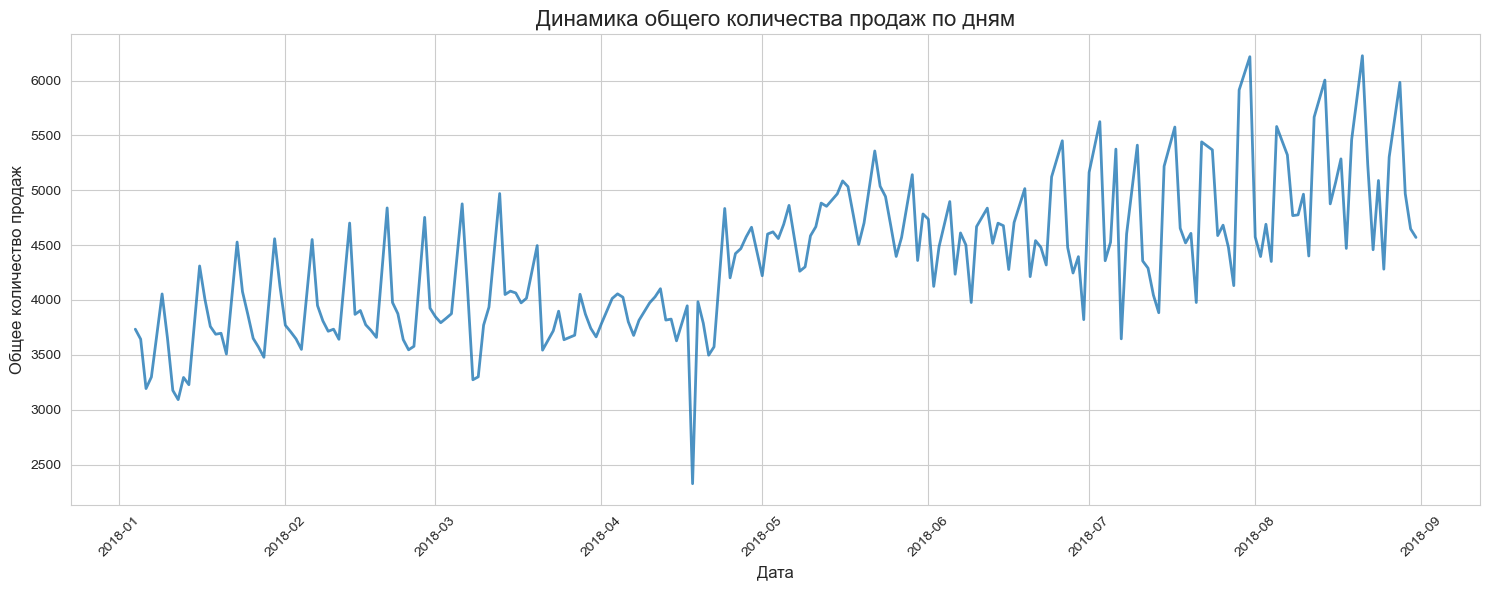

In [23]:
sns.set_style("whitegrid")
plt.figure(figsize=(15, 6))

plt.plot(grouped_df['Дата'], grouped_df['Общее_количество_продаж'],
         color='#1f77b4',  # Синий цвет
         alpha=0.8,
         linewidth=2)

plt.title('Динамика общего количества продаж по дням', fontsize=16)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Общее количество продаж', fontsize=12)

plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

Опишите что вы видите на графике. Ваша задача - максимально описать график

In [ ]:
Суточные продажи достигают нескольких тысяч единиц, что указывает на высокий объем операций.
Прослеживается устойчивый рост — средние значения продаж постепенно увеличиваются.
Присутствуют выраженные повторяющиеся циклы (недельные или месячные), в рамках которых продажи заметно колеблются.
Продажи отличаются значительными дневными скачками — колебания достигают сотен единиц.

Найдите строку, у которой максимальный выброс по количеству продаж (нужно найти выброс у `df`)

In [24]:
max_sales_index = df['Количество'].idxmax()

max_outlier_row = df.loc[max_sales_index]

print("Строка с максимальным количеством продаж (максимальный выброс):")
print(max_outlier_row)

🔍 Строка с максимальным количеством продаж (максимальный выброс):
Дата            2018-06-28 00:00:00
Склад                             1
Контрагент              address_208
Номенклатура              product_0
Количество                      200
Name: 218822, dtype: object


Найдите топовый товар по продажам по средам за июнь, июль, август у 3 склада

In [25]:
filtered_sales = df[
    (df['Склад'] == 3) &
    (df['Дата'].dt.month.isin([6, 7, 8])) &
    (df['Дата'].dt.dayofweek == 2)
]

product_sales = filtered_sales.groupby('Номенклатура')['Количество'].sum()

top_product_name = product_sales.idxmax()
top_product_quantity = product_sales.max()

print(f"Топовый товар (Номенклатура) по продажам:")
print(f"На Складе 3, по Средам, за Июнь-Август: {top_product_name}")
print(f"Общее количество продаж: {top_product_quantity}")

print("\nТаблица продаж всех товаров по заданным условиям (Топ-5):")
print(product_sales.nlargest(5))

Топовый товар (Номенклатура) по продажам:
На Складе 3, по Средам, за Июнь-Август: product_1
Общее количество продаж: 2267

Таблица продаж всех товаров по заданным условиям (Топ-5):
Номенклатура
product_1    2267
product_2    2060
product_0    1324
product_3     914
product_6     650
Name: Количество, dtype: int64


Скачайте данные по погоде с https://rp5.ru/Архив_погоды_в_Астане (скачайте исходные данные, и далее преобразуйте так, чтобы мы имели Дату и Среднюю температуру за день), объедините таблицу температуры с `grouped_df`, и нарисуйте график `y=['Количество продаж', 'T']`, где Т это температура. А также отдельно график температуры.

In [45]:
weather = pd.read_csv(
    "погода.csv",
    skiprows=6,
    sep=';',
    encoding='utf-8'
)

print(weather.head())
print(weather.info())

                  Местное время в Астане      T     Po    P    Pa  \
31.08.2018 23:00                     8.2  736.6  768.3  0.2  78.0   
31.08.2018 20:00                     9.6  736.4  767.9  1.2  88.0   
31.08.2018 17:00                    11.3  735.2  766.4  0.4  83.0   
31.08.2018 14:00                    12.3  734.8  765.9  0.9  80.0   
31.08.2018 11:00                    13.2  733.9  764.8  1.0  83.0   

                                                       U  DD  Ff  ff10  \
31.08.2018 23:00          Ветер, дующий с северо-востока   4 NaN   NaN   
31.08.2018 20:00    Ветер, дующий с западо-северо-запада   3 NaN   NaN   
31.08.2018 17:00  Ветер, дующий с востоко-северо-востока   4 NaN   NaN   
31.08.2018 14:00          Ветер, дующий с северо-востока   4 NaN   NaN   
31.08.2018 11:00   Ветер, дующий с северо-северо-востока   4 NaN   NaN   

                                        ff3  ...  \
31.08.2018 23:00                  70 – 80%.  ...   
31.08.2018 20:00  90  или более, но 

In [46]:
weather.index = pd.to_datetime(weather.index, format="%d.%m.%Y %H:%M")

weather['Дата'] = weather.index.date

daily_weather = (
    weather.groupby('Дата')['T']
    .mean()
    .reset_index()
)

daily_weather['Дата'] = pd.to_datetime(daily_weather['Дата'])

print(daily_weather.head())

        Дата         T
0 2018-01-04  744.6625
1 2018-01-05  745.3000
2 2018-01-06  744.2500
3 2018-01-07  742.2375
4 2018-01-08  737.2625


In [47]:
merged = pd.merge(grouped_df, daily_weather, on='Дата', how='left')
print(merged.head())

        Дата  Общее_количество_продаж         T
0 2018-01-04                     3734  744.6625
1 2018-01-05                     3643  745.3000
2 2018-01-06                     3193  744.2500
3 2018-01-07                     3298  742.2375
4 2018-01-09                     4055  734.1875


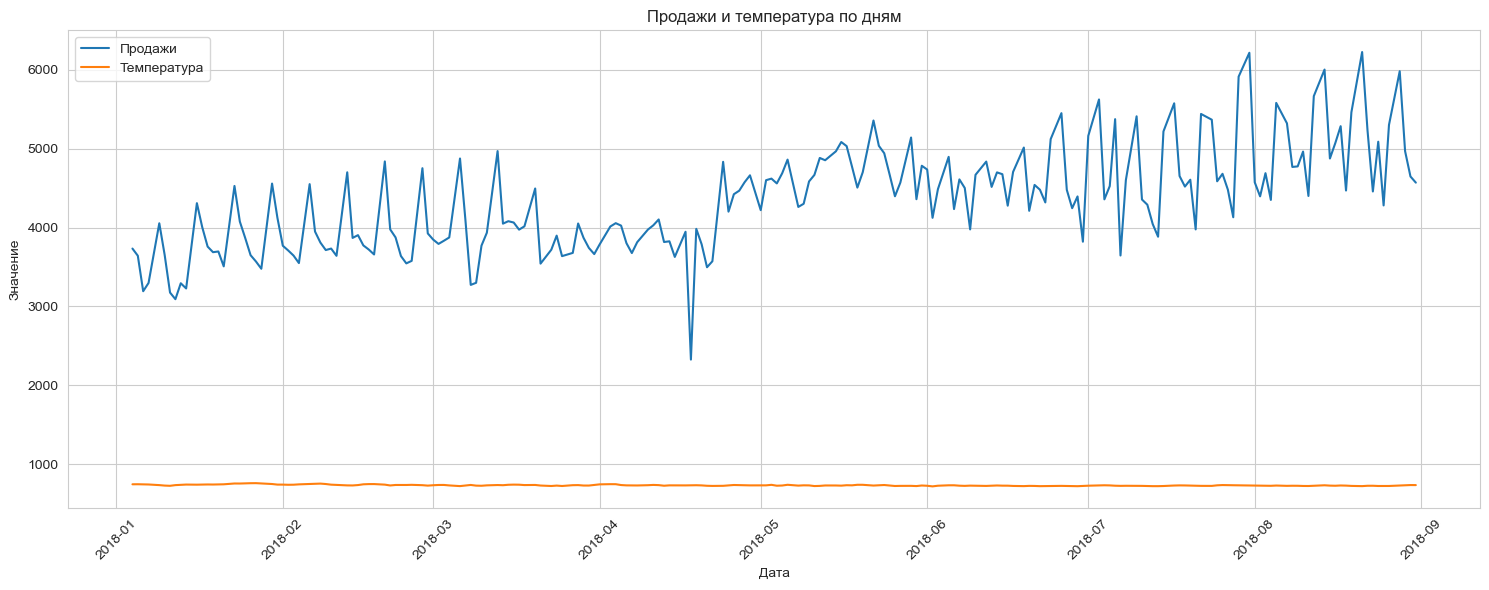

In [48]:
plt.figure(figsize=(15, 6))

plt.plot(merged['Дата'], merged['Общее_количество_продаж'], label='Продажи')
plt.plot(merged['Дата'], merged['T'], label='Температура')

plt.title("Продажи и температура по дням")
plt.xlabel("Дата")
plt.ylabel("Значение")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

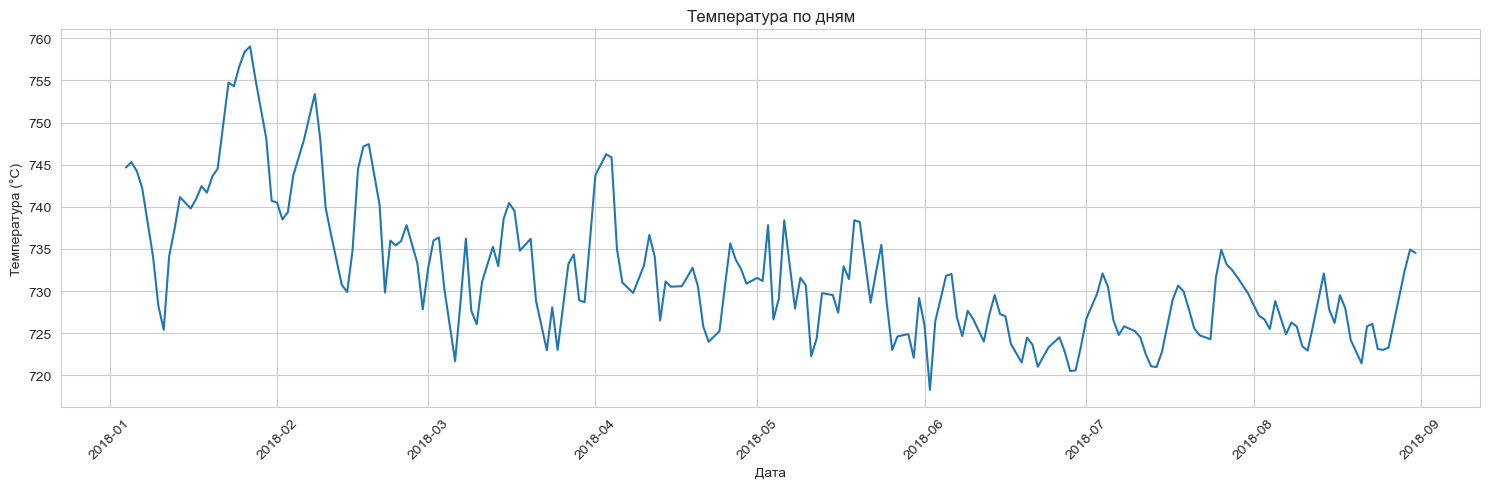

In [49]:
plt.figure(figsize=(15, 5))

plt.plot(merged['Дата'], merged['T'])
plt.title("Температура по дням")
plt.xlabel("Дата")
plt.ylabel("Температура (°C)")
plt.grid(True)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()